In [280]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib qt  
%matplotlib inline

In [281]:
df = pd.read_csv('Data/scada_kaggle.csv')
df.rename(columns={'Date/Time':'Date_Time','LV ActivePower (kW)':'LV_ActivePower(kW)','Wind Speed (m/s)':'Wind_Speed(m/s)',
                   'Theoretical_Power_Curve (KWh)':'Theoretical_Power_Curve(KWh)',
                   'Wind Direction (°)':'Wind_Direction'},inplace=True)
df.head()

,Date_Time,LV_ActivePower(kW),Wind_Speed(m/s),Theoretical_Power_Curve(KWh),Wind_Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


## Context
In Wind Turbines, Scada Systems measure and save data's like wind speed, wind direction, generated power etc. for 10 minutes intervals. This file was taken from a wind turbine's scada system that is working and generating power in Turkey.

## Content
The data's in the file are:
- Date/Time (for 10 minutes intervals)
- LV ActivePower (kW): The power generated by the turbine for that moment
- Wind Speed (m/s): The wind speed at the hub height of the turbine (the wind speed that turbine use for electricity generation)
- TheoreticalPowerCurve (KWh): The theoretical power values that the turbine generates with that wind speed which is given by  the turbine manufacturer
- Wind Direction (°): The wind direction at the hub height of the turbine (wind turbines turn to this direction automaticly)

In [282]:
df.describe()

,LV_ActivePower(kW),Wind_Speed(m/s),Theoretical_Power_Curve(KWh),Wind_Direction
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date_Time                     50530 non-null  object 
 1   LV_ActivePower(kW)            50530 non-null  float64
 2   Wind_Speed(m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve(KWh)  50530 non-null  float64
 4   Wind_Direction                50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [284]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'],format='%d %m %Y %H:%M')
df['Hour'] = df['Date_Time'].dt.hour
df['Minute'] = df['Date_Time'].dt.minute
df['Day'] = df['Date_Time'].dt.day
df['Month'] = df['Date_Time'].dt.month
df['Year'] = df['Date_Time'].dt.year
df.head()

,Date_Time,LV_ActivePower(kW),Wind_Speed(m/s),Theoretical_Power_Curve(KWh),Wind_Direction,Hour,Minute,Day,Month,Year
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0,0,1,1,2018
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,0,10,1,1,2018
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,0,20,1,1,2018
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,0,30,1,1,2018
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,0,40,1,1,2018


In [285]:
# Calculating difference between theoretical power Curve and LV Active Power
df['Energy_Difference(KW)'] = df['Theoretical_Power_Curve(KWh)']-df['LV_ActivePower(kW)']
df['Energy_Difference(KW)'].head(5)

0     36.281117
1     66.148316
2     84.523429
3     96.481664
4    111.052276
Name: Energy_Difference(KW), dtype: float64

In [292]:
df = df.reindex(columns=['Minute','Hour','Day', 'Month','Year','Date_Time', 'LV_ActivePower(kW)', 
       'Theoretical_Power_Curve(KWh)','Energy_Difference(KW)', 'Wind_Direction','Wind_Speed(m/s)'])
df.head()

,Minute,Hour,Day,Month,Year,Date_Time,LV_ActivePower(kW),Theoretical_Power_Curve(KWh),Energy_Difference(KW),Wind_Direction,Wind_Speed(m/s)
Date_Time,,,,,,,,,,,
2018-01-01 00:00:00,0,0,1,1,2018,2018-01-01 00:00:00,380.047791,416.328908,36.281117,259.994904,5.311336
2018-01-01 00:10:00,10,0,1,1,2018,2018-01-01 00:10:00,453.769196,519.917511,66.148316,268.641113,5.672167
2018-01-01 00:20:00,20,0,1,1,2018,2018-01-01 00:20:00,306.376587,390.900016,84.523429,272.564789,5.216037
2018-01-01 00:30:00,30,0,1,1,2018,2018-01-01 00:30:00,419.645905,516.127569,96.481664,271.258087,5.659674
2018-01-01 00:40:00,40,0,1,1,2018,2018-01-01 00:40:00,380.650696,491.702972,111.052276,265.674286,5.577941


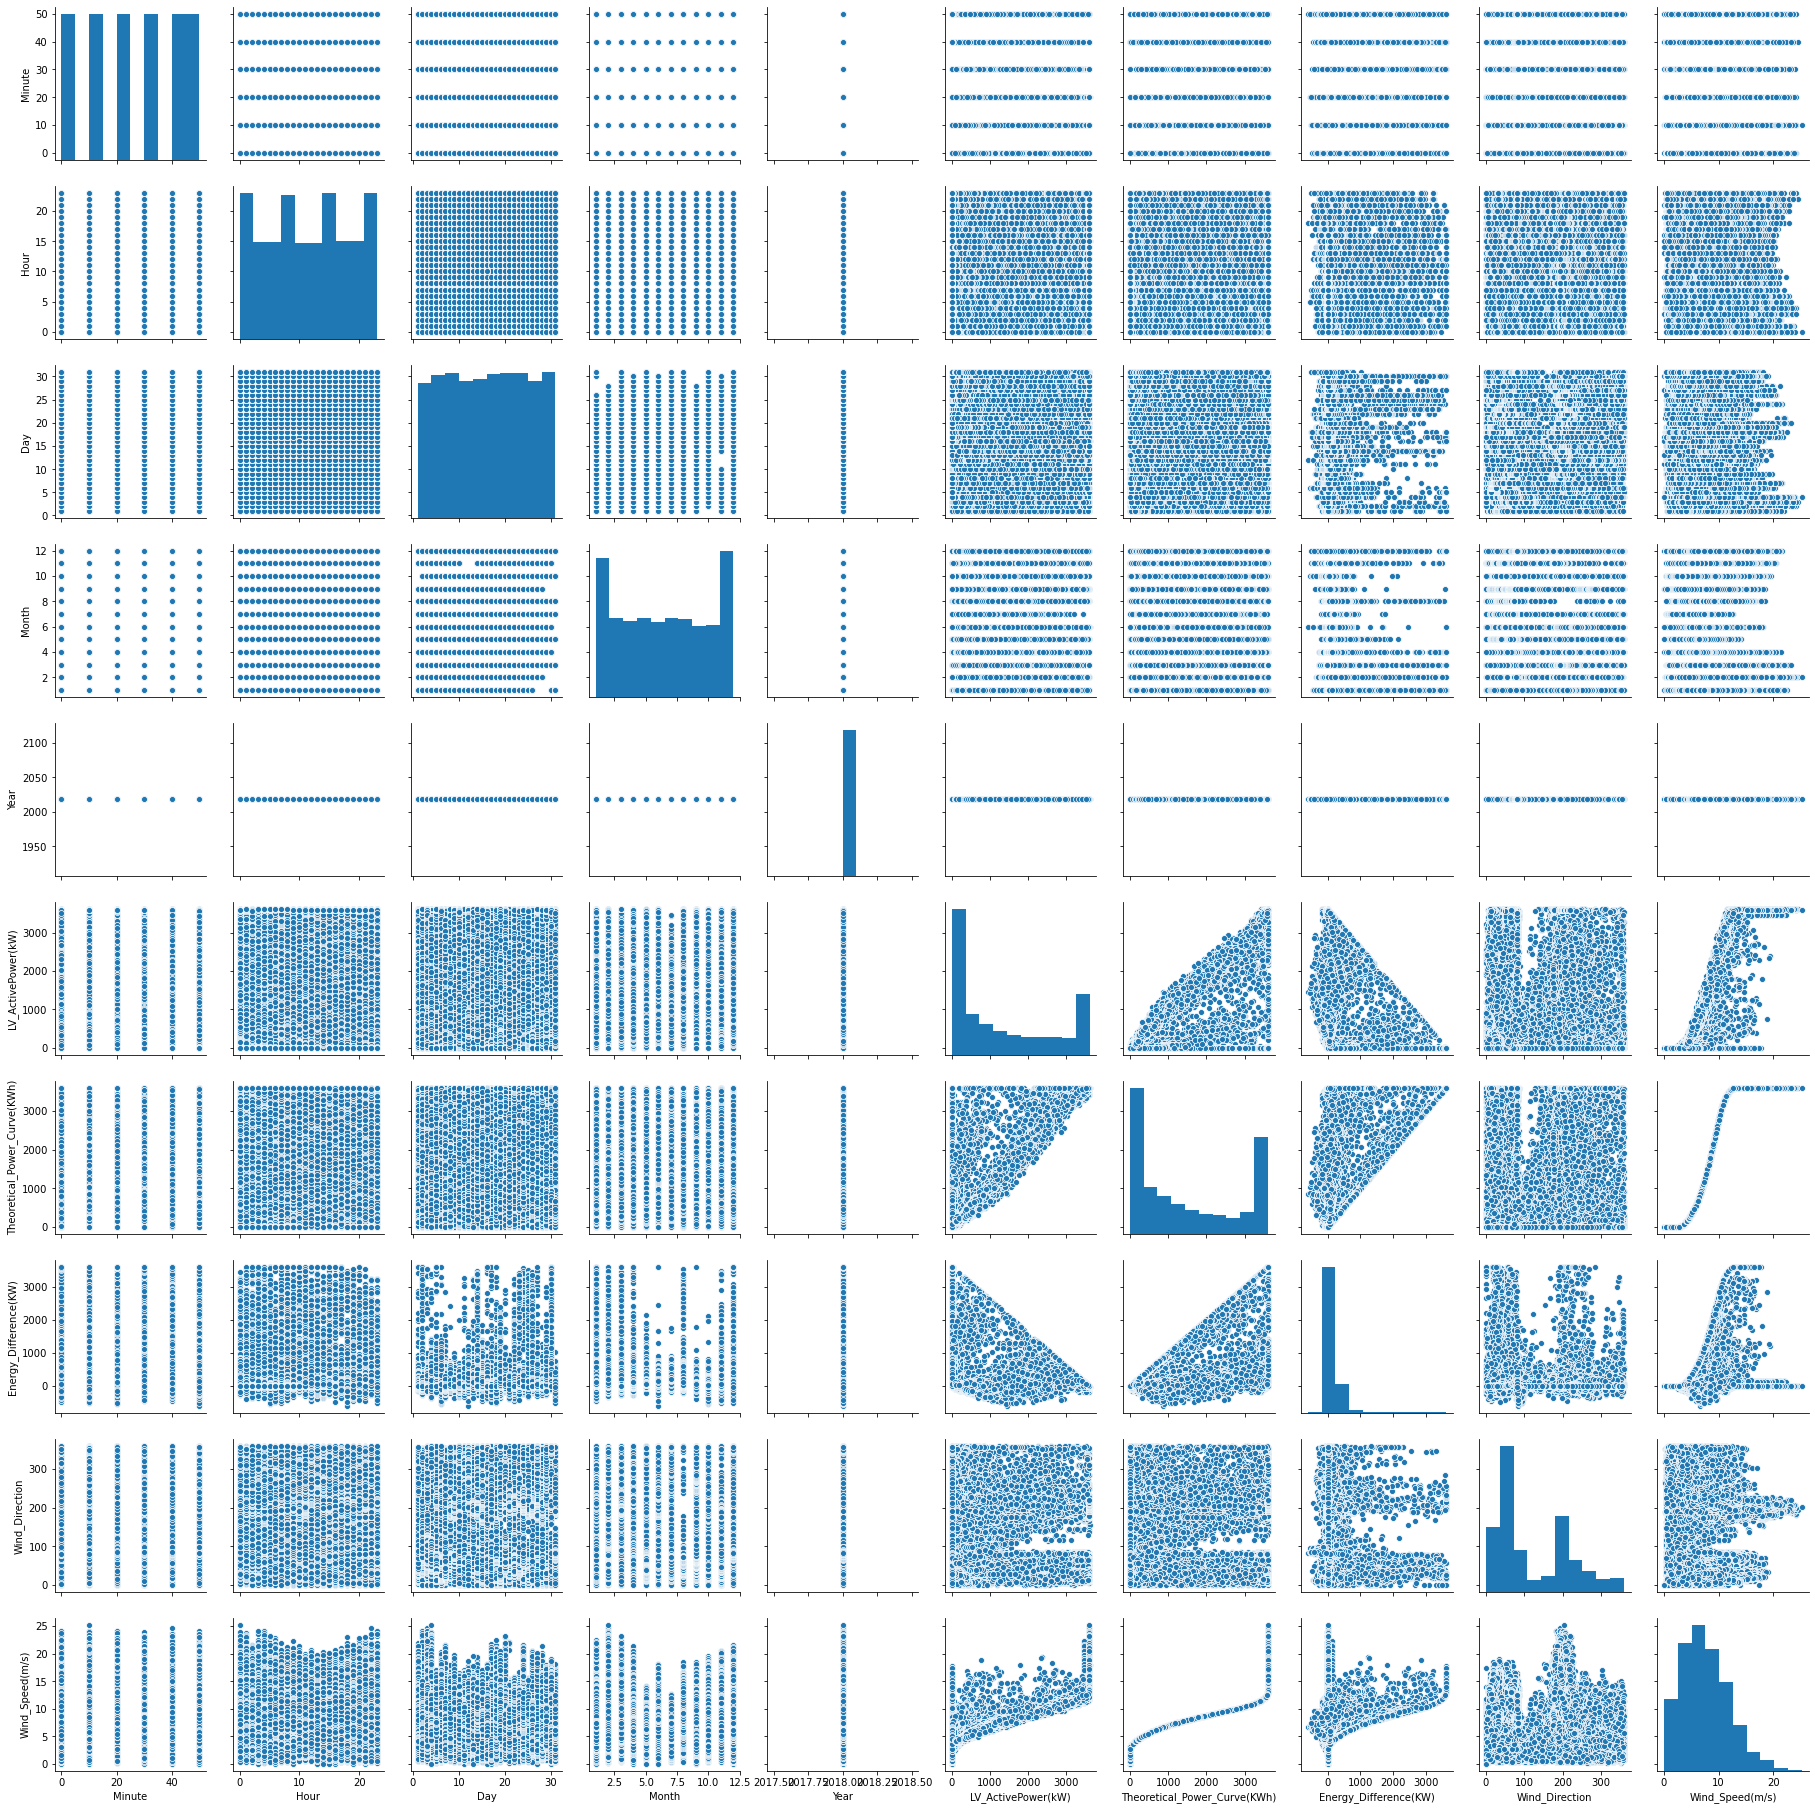

In [287]:
sns.pairplot(df)

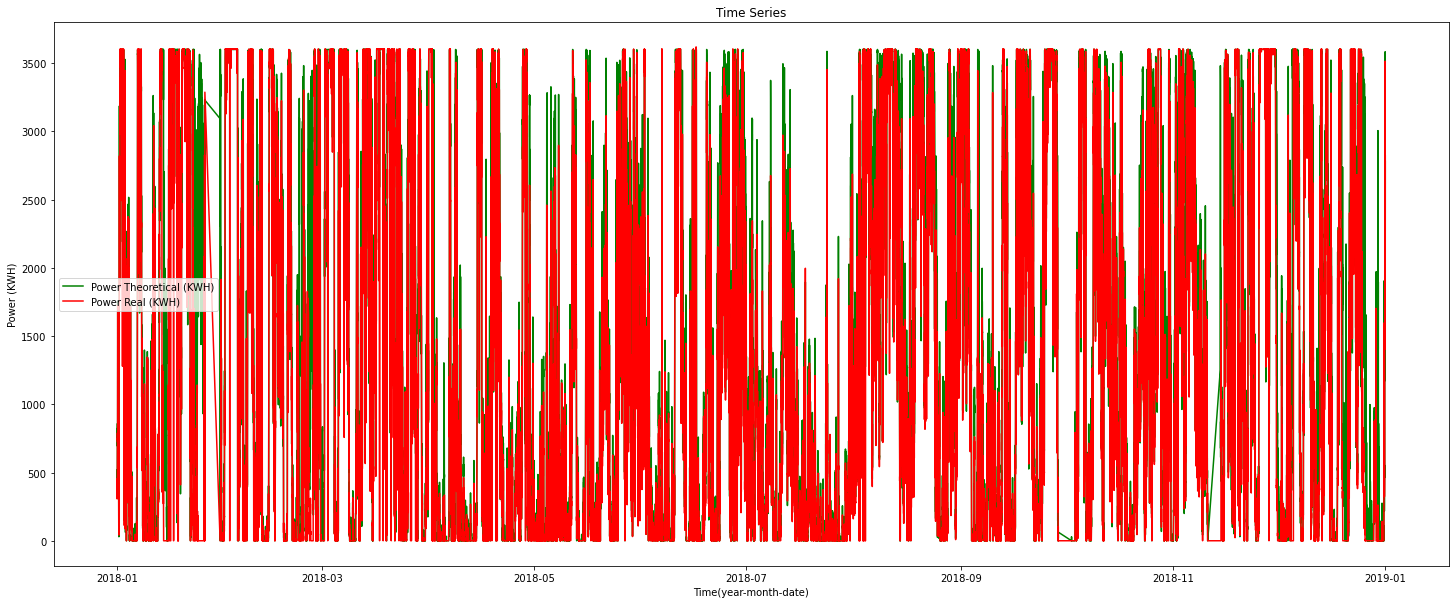

In [295]:
# Theoretical and Realtime Production
df.index = df['Date_Time'] # indexing the Datetime to get the time period on the x-axis.
ts_theoretical = df['Theoretical_Power_Curve(KWh)']
ts_real = df['LV_ActivePower(kW)']
plt.figure(figsize=(25,10))
plt.plot(ts_theoretical, label='Power Theoretical (KWH)',color='green')
plt.plot(ts_real,label='Power Real (KWH)',color='red')
plt.title('Time Series')
plt.xlabel("Time(year-month-date)")
plt.ylabel("Power (KWH)")
plt.legend(loc='best')

C:\Users\Asish\.conda\envs\SmartInternz\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


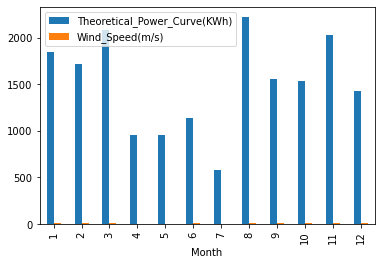

In [289]:
df.groupby('Month')['Theoretical_Power_Curve(KWh)','Wind_Speed(m/s)'].mean().plot.bar()

In [300]:
df.reset_index(drop=True,inplace=True)
df.to_csv('Data\edited.csv')

In [262]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Minute', 'Hour' ,'Day', 'Month','Wind_Direction', 'Wind_Speed(m/s)']], 
        df['LV_ActivePower(kW)'], test_size=0.33, random_state=42)

### 1.MLFNN

# LSTM

In [9]:
import torch
from torch import nn
import torch.nn.functional as F

In [10]:
# check if GPU is available
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
else: 
    print('No GPU available, training on CPU; consider making n_epochs very small.')

No GPU available, training on CPU; consider making n_epochs very small.


In [11]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()
        
        self.hidden_dim=hidden_dim

        # define an RNN with specified parameters
        # batch_first means that the first dim of the input and output will be the batch_size
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)
        
        # last, fully-connected layer
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden):
        # x (batch_size, seq_length, input_size)
        # hidden (n_layers, batch_size, hidden_dim)
        # r_out (batch_size, time_step, hidden_size)
        batch_size = x.size(0)
        
        # get RNN outputs
        r_out, hidden = self.rnn(x, hidden)
        # shape output to be (batch_size*seq_length, hidden_dim)
        r_out = r_out.view(-1, self.hidden_dim)  
        
        # get final output 
        output = self.fc(r_out)
        
        return output, hidden

### Testing RNN architecture

In [ ]:
test_rnn = RNN(input_size=1, output_size=1, hidden_dim=10, n_layers=2)

# generate evenly spaced, test data pts
time_steps = np.linspace(0, np.pi, seq_length)
data = np.sin(time_steps)
data.resize((seq_length, 1))

test_input = torch.Tensor(data).unsqueeze(0) # give it a batch_size of 1 as first dimension
print('Input size: ', test_input.size())

# test out rnn sizes
test_out, test_h = test_rnn(test_input, None)
print('Output size: ', test_out.size())
print('Hidden state size: ', test_h.size())
